## Supervised Learning
## Project: Churn Detection in Telecommunications

## Getting Started



----
## Exploring the Data


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import warnings
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("churn_data.csv")

# Success - Display the first record
display(data.head(n=1))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


** Featureset Exploration **

* **customerID**: Customer ID
* **gender**:Whether the customer is a male or a female
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenureNumber**: # of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMoviesWhether**: the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)

### Implementation: Data Exploration


Total number of records: 7043
Individuals who churned: 1869
Individuals who did not churn: 5174
Percentage of individuals who churned: 26.54%


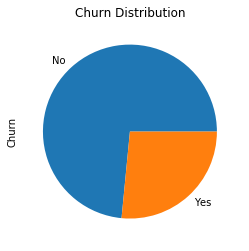

In [2]:
#Total number of records
n_records = len(data)

# Number of records where did churn
churn_count = len(data[data.Churn == 'Yes'])

#Number of records where individual's did not churn
nochurn_count = len(data[data.Churn == 'No'])

# Percentage of individuals who churned
churn_percent = churn_count / n_records

df = pd.DataFrame(data, index= data.columns)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals who churned: {}".format(churn_count))
print("Individuals who did not churn: {}".format(nochurn_count))
print("Percentage of individuals who churned: {}%".format(round(churn_percent*100, 2)))
pd.value_counts(data['Churn']).plot(kind="pie",title="Churn Distribution")

### Implementation: Exploratory Visualization


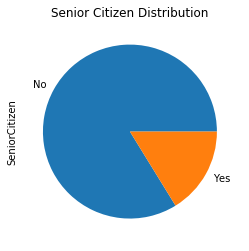

In [3]:
pd.value_counts(data['SeniorCitizen']).plot(kind="pie",title="Senior Citizen Distribution", labels=["No", "Yes"])

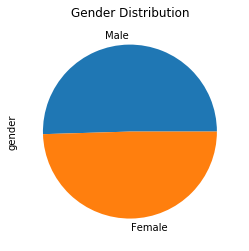

In [4]:
pd.value_counts(data['gender']).plot(kind="pie",title="Gender Distribution")

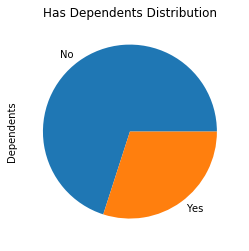

In [5]:
pd.value_counts(data['Dependents']).plot(kind="pie",title="Has Dependents Distribution")

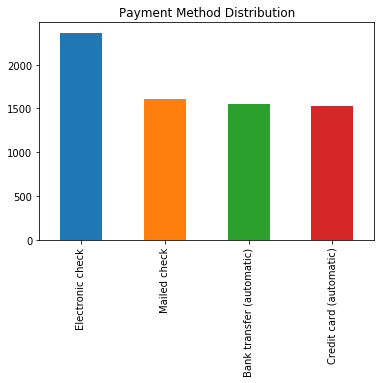

In [6]:
pd.value_counts(data['PaymentMethod']).plot(kind="bar",title="Payment Method Distribution")

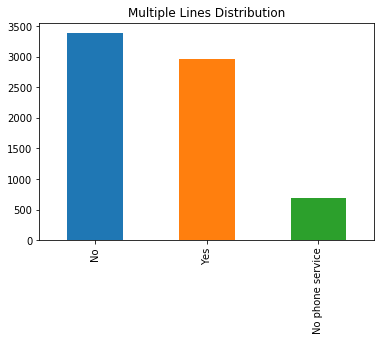

In [7]:
pd.value_counts(data['MultipleLines']).plot(kind="bar",title="Multiple Lines Distribution")

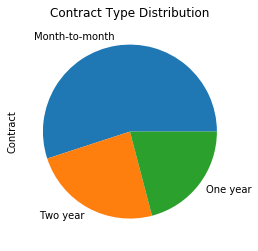

In [8]:
pd.value_counts(data['Contract']).plot(kind="pie",title="Contract Type Distribution")

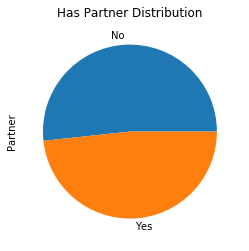

In [9]:
pd.value_counts(data['Partner']).plot(kind="pie",title="Has Partner Distribution")

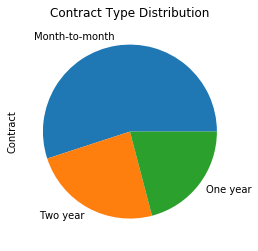

In [10]:
pd.value_counts(data['Contract']).plot(kind="pie",title="Contract Type Distribution")

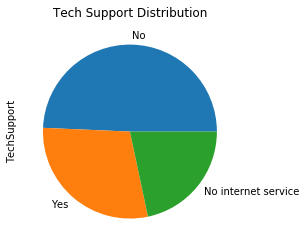

In [11]:
pd.value_counts(data['TechSupport']).plot(kind="pie",title="Tech Support Distribution")

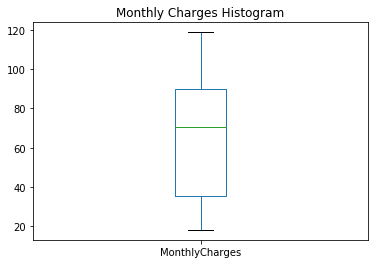

In [12]:
data['MonthlyCharges'].plot(kind="box",title="Monthly Charges Histogram", )

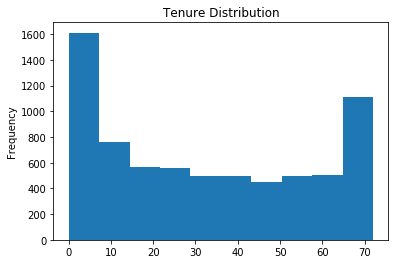

In [13]:
data['tenure'].plot(kind="hist",title="Tenure Distribution")

----
## Preparing the Data


In [14]:
#Export the churn results field for model training and testing
churn_raw = data['Churn']
#drop the target variable and irrelevant customer unqiue id field.
features_raw = data.drop(columns={'Churn','customerID'})
#convert total charges field to numeric
features_raw.TotalCharges = pd.to_numeric(features_raw.TotalCharges, errors='coerce')
#fill an null values with 0
features_raw = features_raw.fillna(0)


### Implementation: Data Preprocessing


In [15]:
from sklearn.preprocessing import MinMaxScaler

#identify fields that will be min max scales
min_max_features = ["TotalCharges","MonthlyCharges","tenure"]
#identify fields that will be one-hot encoded
encoded_features = features_raw.drop(columns=min_max_features).columns
#intiailize the min max scaler with values from 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
#apply scaling for min max
features_raw[min_max_features] = scaler.fit_transform(features_raw[min_max_features])
#perform one-hot encoding on enconded features
features_final = pd.get_dummies(features_raw, columns=encoded_features)
#create dictionary to map behavior to numeric
# TODO: Encode the 'income_raw' data to numerical values
dict1 = {"Yes" : 1, "No": 0}
#apply dictionary to churn prediction
churn = churn_raw.map(dict1)
# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(features_final.columns)))


46 total features after one-hot encoding.


In [16]:
#copy data set for visualization
visualization = features_final.copy()
#apply predictive churn value to the visualization dataset
visualization['Churn'] = churn
#split churners and non churners
churned = visualization[visualization.Churn==1]
nochurned = visualization[visualization.Churn==0]
#apply the mean function to observe difference between encoded features
behavioral_differences = churned.mean()-nochurned.mean()


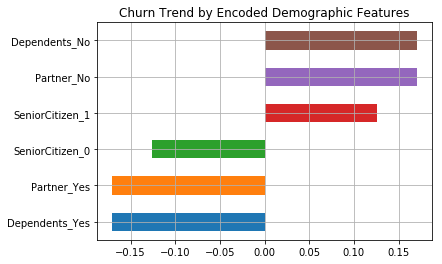

In [17]:
#import internal visualization library 
import charthelper as ch
ch.displayDifferences(behavioral_differences[3:11], "Churn Trend by Encoded Demographic Features", 'barh', .10)

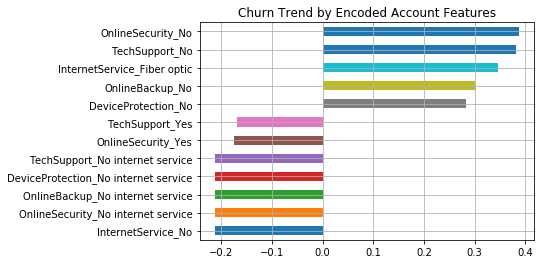

In [18]:
ch.displayDifferences(behavioral_differences[11:31], "Churn Trend by Encoded Account Features", 'barh', .15)

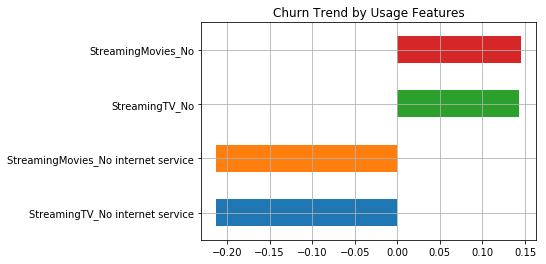

In [19]:
ch.displayDifferences(behavioral_differences[31:37], "Churn Trend by Usage Features", 'barh',.10)

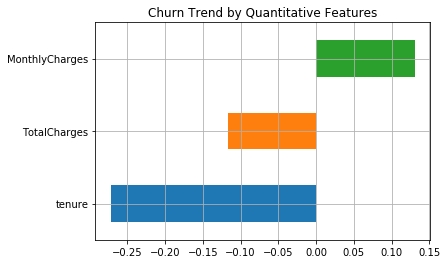

In [20]:
ch.displayDifferences(behavioral_differences[0:3], "Churn Trend by Quantitative Features", 'barh', .10)

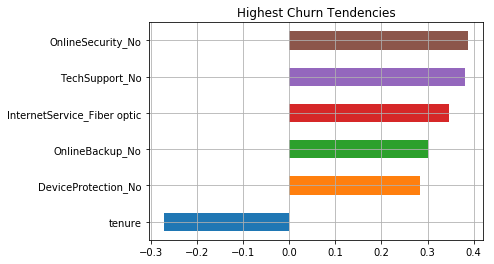

In [21]:
ch.displayDifferences(behavioral_differences[0:37], "Highest Churn Tendencies", 'barh', .25)

### Shuffle and Split Data


In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    churn, 
                                                    test_size = 0.2, 
                                                    random_state = 41)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 5634 samples.
Testing set has 1409 samples.


### Implementation - Creating a Training and Predicting Pipeline


### Implementation: Initial Model Evaluation


In [23]:
#Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#Import scorer used to measure performance, fbeta score
from sklearn.metrics import fbeta_score, make_scorer

#Import grid search functionality got optimization testing
from sklearn.model_selection import GridSearchCV

#Import locally developed library for visualizations
import charthelper as ch

beta=2

scorer = make_scorer(fbeta_score, beta=beta)

#Initialize the three models
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = MLPClassifier(activation='relu')
clf_C = AdaBoostClassifier(random_state=42)


----
## Improving Results
 

### Implementation: Model Tuning


In [24]:
clf_DT = clf_A

start = time()

parameters = {
    'min_samples_split' : range(10,500,25),
    'max_depth': range(1,20,2)}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_DT, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_DT = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_DT.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_DT.predict(X_test)

end = time()

duration = end-start

Best parameters set found on development set:

{'max_depth': 7, 'min_samples_split': 235}



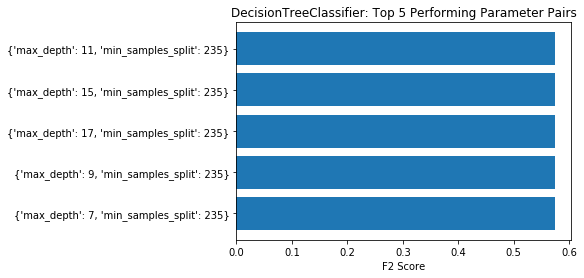

In [25]:
ch.displayGridScores(grid_fit,best_clf_DT.__class__.__name__)

Default Confusion Matrix : 
[[827 201]
 [188 193]]

Optimized Confusion Matrix : 
[[921 107]
 [187 194]]

DecisionTreeClassifier Model
------

Unoptimized model
------
Accuracy score on testing data: 0.7239
F-score on testing data: 0.5031

Optimized Model
------
Final accuracy score on the testing data: 0.7913
Final F-score on the testing data: 0.5315

Performance and Improvement
------
Time Taken: 0:00:06.475637
Accuracy Score Improvement: 0.0674
F Score Improvement: 0.0284



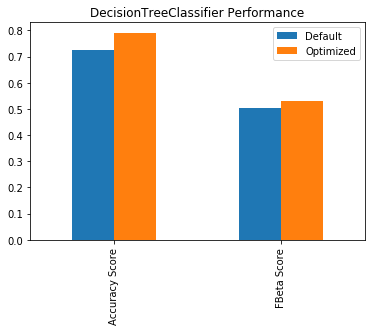

In [26]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_DT.__class__.__name__, duration)

In [27]:
clf_MLP = clf_B

start = time()

#parameters = {'max_iter': [10,20, 25,30], 'alpha': 10.0 ** -np.arange(1, 5)}
parameters = {
    'hidden_layer_sizes': range(100,150,10),
    'max_iter': range(200,240,20),
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam']
}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_MLP, parameters, scoring=scorer, verbose=1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_MLP = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_MLP.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_MLP.predict(X_test)

end = time()

duration = end-start

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


Best parameters set found on development set:

{'activation': 'logistic', 'hidden_layer_sizes': 130, 'max_iter': 220, 'solver': 'adam'}



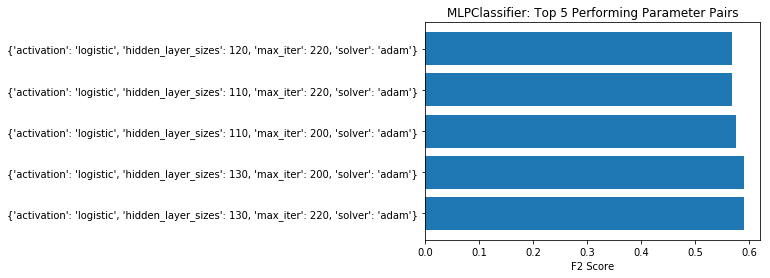

In [29]:
ch.displayGridScores(grid_fit, best_clf_MLP.__class__.__name__)

Default Confusion Matrix : 
[[855 173]
 [176 205]]

Optimized Confusion Matrix : 
[[915 113]
 [181 200]]

MLPClassifier Model
------

Unoptimized model
------
Accuracy score on testing data: 0.7523
F-score on testing data: 0.5389

Optimized Model
------
Final accuracy score on the testing data: 0.7913
Final F-score on the testing data: 0.5444

Performance and Improvement
------
Time Taken: 0:03:48.614985
Accuracy Score Improvement: 0.0390
F Score Improvement: 0.0055



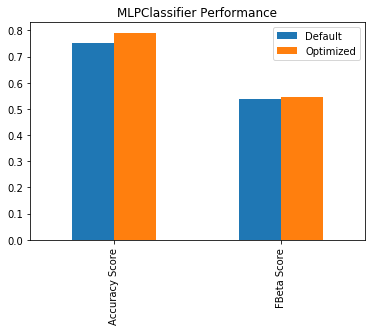

In [30]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_MLP.__class__.__name__, duration)

In [31]:
clf_Ada = clf_C

parameters = {"algorithm" : ["SAMME", "SAMME.R"],
              "learning_rate" : [0.0001, 0.001, 0.01, 1.0],
              "n_estimators": range(20,40,5)
             }


# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_Ada, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf_Ada = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_Ada.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_Ada.predict(X_test)
duration = end-start

Best parameters set found on development set:

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 25}



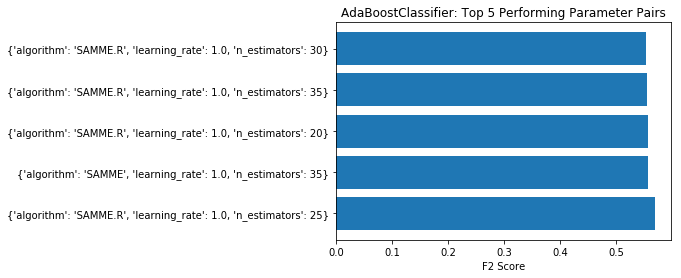

In [32]:
ch.displayGridScores(grid_fit, best_clf_Ada.__class__.__name__)

Default Confusion Matrix : 
[[913 115]
 [167 214]]

Optimized Confusion Matrix : 
[[913 115]
 [162 219]]

AdaBoostClassifier Model
------

Unoptimized model
------
Accuracy score on testing data: 0.7999
F-score on testing data: 0.5774

Optimized Model
------
Final accuracy score on the testing data: 0.8034
Final F-score on the testing data: 0.5893

Performance and Improvement
------
Time Taken: 0:03:48.614985
Accuracy Score Improvement: 0.0035
F Score Improvement: 0.0119



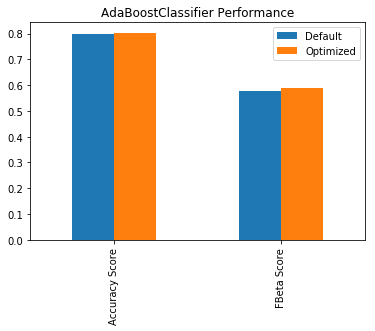

In [33]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_Ada.__class__.__name__, duration)

### Implementation - Operationalizing the Model for Consumption


In [36]:
#improt picke for object serialization to place model and column defition to the project folder
import _pickle as cPickle
#dump the model and columndefinition
cPickle.dump(best_clf_Ada,open('model.pkl', 'wb'))
cPickle.dump(X_test.columns, open("columns.pkl",'wb'))

In [ ]:
### Implementation - Call Lamda Function to Consume Model Externally

In [37]:
import requests, json

#api_enabled is set to false by default to allow simulated call
api_enabled = 'true' 

#call Flask API Deployed to Lamda
url = "https://8m2g43o13c.execute-api.us-east-2.amazonaws.com/dev/api"

#payload containing the features, expectation is churn prediction of 1
payload = {
	"tenure": 0.75,
	"MonthlyCharges": 0.8144278607,
	"TotalCharges": 0.6264853537,
	"gender_Female": 1.0,
	"gender_Male": 0.0,
	"SeniorCitizen_0": 1.0,
	"SeniorCitizen_1": 0.0,
	"Partner_No": 1.0,
	"Partner_Yes": 0.0,
	"Dependents_No": 1.0,
	"Dependents_Yes": 0.0,
	"PhoneService_No": 0.0,
	"PhoneService_Yes": 1.0,
	"MultipleLines_No": 0.0,
	"MultipleLines_No phone service": 0.0,
	"MultipleLines_Yes": 1.0,
	"InternetService_DSL": 0.0,
	"InternetService_Fiber optic": 1.0,
	"InternetService_No": 0.0,
	"OnlineSecurity_No": 1.0,
	"OnlineSecurity_No internet service": 0.0,
	"OnlineSecurity_Yes": 0.0,
	"OnlineBackup_No": 1.0,
	"OnlineBackup_No internet service": 0.0,
	"OnlineBackup_Yes": 0.0,
	"DeviceProtection_No": 1.0,
	"DeviceProtection_No internet service": 0.0,
	"DeviceProtection_Yes": 0.0,
	"TechSupport_No": 0.0,
	"TechSupport_No internet service": 0.0,
	"TechSupport_Yes": 1.0,
	"StreamingTV_No": 0.0,
	"StreamingTV_No internet service": 0.0,
	"StreamingTV_Yes": 1.0,
	"StreamingMovies_No": 0.0,
	"StreamingMovies_No internet service": 0.0,
	"StreamingMovies_Yes": 1.0,
	"Contract_Month-to-month": 1.0,
	"Contract_One year": 0.0,
	"Contract_Two year": 0.0,
	"PaperlessBilling_No": 0.0,
	"PaperlessBilling_Yes": 1.0,
	"PaymentMethod_Bank transfer (automatic)": 0.0,
	"PaymentMethod_Credit card (automatic)": 0.0,
	"PaymentMethod_Electronic check": 1.0,
	"PaymentMethod_Mailed check": 0.0
}


#if api_enabled, call the real-time service suing requests library, if not just use the simulated response.
if api_enabled=='true':
    r = requests.post(url, json=payload)
    print('Lambda Flask API Response: ' + str(r.json()))
else:
    print("'Simulated Response' : {'Churn':1}")

Lambda Flask API Response: {'result': 1}


In [38]:
### Implementation - Output predictive model to PMML

In [40]:
# Install a pip package in the current Jupyter kernel
import sys


#if you wish to test the pmml package, run the cel below 
!{sys.executable} -m pip install sklearn2pmml
from sklearn2pmml import sklearn2pmml, PMMLPipeline, DataFrameMapper


#if the library is enabled, this will take the metadata, and model defintion and write the result to the project folder as ChurnModel.pmml
default_mapper = DataFrameMapper([(i, None) for i in X_test.columns])

from sklearn2pmml import sklearn2pmml
pipeline = PMMLPipeline([
	("mapper", default_mapper), ("classifier", best_clf_MLP)
])
sklearn2pmml(pipeline, "ChurnModel.pmml")